# Ames housing

No fake data, and much wrangling needed.

<a id="importing"></a>
## Importing libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The style package adds support for easy-to-switch plotting
# "styles" with the same parameters as a matplotlib rc file
# (which is read at startup to configure Matplotlib).
# There are a number of pre-defined styles provided by Matplotlib.
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
plt.style.use("fivethirtyeight")

# To render matplotlib images in Python notebooks at double the
# standard resolution, providing users of high-resolution screens
# with a better visualization experience, set the retina or
# png2x option:
# %config InlineBackend.figure_format = 'retina'

<a id="set-paths"></a>
## Set paths

In [3]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [4]:
# Get the data
ames = pd.read_csv("datasets/AmesHousing.csv")

In [5]:
ames.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

<a id="wrangling"></a>
## Wrangling

In [6]:
# Change columns names to lower case
ames.columns = ames.columns.str.lower().str.replace(" ", "_")

# Increase pandas default max_rows and max_colums
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

# Look at shape, information on, and summary statistics of the dataset
ames.shape

(2930, 82)

In [7]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order            2930 non-null   int64  
 1   pid              2930 non-null   int64  
 2   ms_subclass      2930 non-null   int64  
 3   ms_zoning        2930 non-null   object 
 4   lot_frontage     2440 non-null   float64
 5   lot_area         2930 non-null   int64  
 6   street           2930 non-null   object 
 7   alley            198 non-null    object 
 8   lot_shape        2930 non-null   object 
 9   land_contour     2930 non-null   object 
 10  utilities        2930 non-null   object 
 11  lot_config       2930 non-null   object 
 12  land_slope       2930 non-null   object 
 13  neighborhood     2930 non-null   object 
 14  condition_1      2930 non-null   object 
 15  condition_2      2930 non-null   object 
 16  bldg_type        2930 non-null   object 
 17  house_style   

In [8]:
ames.describe().T

count          mean           std          min  \
order            2930.0  1.465500e+03  8.459625e+02          1.0   
pid              2930.0  7.144645e+08  1.887308e+08  526301100.0   
ms_subclass      2930.0  5.738737e+01  4.263802e+01         20.0   
lot_frontage     2440.0  6.922459e+01  2.336533e+01         21.0   
lot_area         2930.0  1.014792e+04  7.880018e+03       1300.0   
overall_qual     2930.0  6.094881e+00  1.411026e+00          1.0   
overall_cond     2930.0  5.563140e+00  1.111537e+00          1.0   
year_built       2930.0  1.971356e+03  3.024536e+01       1872.0   
year_remod/add   2930.0  1.984267e+03  2.086029e+01       1950.0   
mas_vnr_area     2907.0  1.018968e+02  1.791126e+02          0.0   
bsmtfin_sf_1     2929.0  4.426296e+02  4.555908e+02          0.0   
bsmtfin_sf_2     2929.0  4.972243e+01  1.691685e+02          0.0   
bsmt_unf_sf      2929.0  5.592625e+02  4.394942e+02          0.0   
total_bsmt_sf    2929.0  1.051615e+03  4.406151e+02          0.0   
1st_flr_sf       2930.0  1.159558e+03  3.918909e+02        334.0   
2nd_flr_sf       2930.0  3.354560e+02  4.283957e+02          0.0   
low_qual_fin_sf  2930.0  4.676792e+00  4.631051e+01          0.0   
gr_liv_area      2930.0  1.499690e+03  5.055089e+02        334.0   
bsmt_full_bath   2928.0  4.313525e-01  5.248202e-01          0.0   
bsmt_half_bath   2928.0  6.113388e-02  2.452536e-01          0.0   
full_bath        2930.0  1.566553e+00  5.529406e-01          0.0   
half_bath        2930.0  3.795222e-01  5.026293e-01          0.0   
bedroom_abvgr    2930.0  2.854266e+00  8.277311e-01          0.0   
kitchen_abvgr    2930.0  1.044369e+00  2.140762e-01          0.0   
totrms_abvgrd    2930.0  6.443003e+00  1.572964e+00          2.0   
fireplaces       2930.0  5.993174e-01  6.479209e-01          0.0   
garage_yr_blt    2771.0  1.978132e+03  2.552841e+01       1895.0   
garage_cars      2929.0  1.766815e+00  7.605664e-01          0.0   
garage_area      2929.0  4.728197e+02  2.150465e+02          0.0   
wood_deck_sf     2930.0  9.375188e+01  1.263616e+02          0.0   
open_porch_sf    2930.0  4.753345e+01  6.748340e+01          0.0   
enclosed_porch   2930.0  2.301160e+01  6.413906e+01          0.0   
3ssn_porch       2930.0  2.592491e+00  2.514133e+01          0.0   
screen_porch     2930.0  1.600205e+01  5.608737e+01          0.0   
pool_area        2930.0  2.243345e+00  3.559718e+01          0.0   
misc_val         2930.0  5.063515e+01  5.663443e+02          0.0   
mo_sold          2930.0  6.216041e+00  2.714492e+00          1.0   
yr_sold          2930.0  2.007790e+03  1.316613e+00       2006.0   
saleprice        2930.0  1.807961e+05  7.988669e+04      12789.0   

                          25%          50%           75%           max  
order            7.332500e+02       1465.5  2.197750e+03  2.930000e+03  
pid              5.284770e+08  535453620.0  9.071811e+08  1.007100e+09  
ms_subclass      2.000000e+01         50.0  7.000000e+01  1.900000e+02  
lot_frontage     5.800000e+01         68.0  8.000000e+01  3.130000e+02  
lot_area         7.440250e+03       9436.5  1.155525e+04  2.152450e+05  
overall_qual     5.000000e+00          6.0  7.000000e+00  1.000000e+01  
overall_cond     5.000000e+00          5.0  6.000000e+00  9.000000e+00  
year_built       1.954000e+03       1973.0  2.001000e+03  2.010000e+03  
year_remod/add   1.965000e+03       1993.0  2.004000e+03  2.010000e+03  
mas_vnr_area     0.000000e+00          0.0  1.640000e+02  1.600000e+03  
bsmtfin_sf_1     0.000000e+00        370.0  7.340000e+02  5.644000e+03  
bsmtfin_sf_2     0.000000e+00          0.0  0.000000e+00  1.526000e+03  
bsmt_unf_sf      2.190000e+02        466.0  8.020000e+02  2.336000e+03  
total_bsmt_sf    7.930000e+02        990.0  1.302000e+03  6.110000e+03  
1st_flr_sf       8.762500e+02       1084.0  1.384000e+03  5.095000e+03  
2nd_flr_sf       0.000000e+00          0.0  7.037500e+02  2.065000e+03  
low_qual_fin_sf  0.000000e+00          0.0  0.000000e+00

In [9]:
# Investigate nulls
ames.isnull().sum()[0:90]

order                 0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        490
lot_area              0
street                0
alley              2732
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         23
mas_vnr_area         23
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            80
bsmt_cond            80
bsmt_exposure        83
bsmtfin_type_1       80
bsmtfin_sf_1          1
bsmtfin_type_2       81
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

In [10]:
# Missing values: Lot Frontage (Linear feet of street connected to property)
ames["lot_frontage"].value_counts().head()

60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: lot_frontage, dtype: int64

In [11]:
# Filter to examine only null values:
lot_nulls = ames[ames["lot_frontage"].isna()]
lot_nulls.head()

order        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
11     12  527165230           20        RL           NaN      7980   Pave   
14     15  527182190          120        RL           NaN      6820   Pave   
22     23  527368020           60        FV           NaN      7500   Pave   
23     24  527402200           20        RL           NaN     11241   Pave   
24     25  527402250           20        RL           NaN     12537   Pave   

   alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
11   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
14   NaN       IR1          Lvl    AllPub     Corner        Gtl      StoneBr   
22   NaN       Reg          Lvl    AllPub     Inside        Gtl      Somerst   
23   NaN       IR1          Lvl    AllPub    CulDSac        Gtl        NAmes   
24   NaN       IR1          Lvl    AllPub    CulDSac        Gtl        NAmes   

   condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
11        Norm        Norm      1Fam      1Story             6             7   
14        Norm        Norm    TwnhsE      1Story             8             5   
22        Norm        Norm      1Fam      2Story             7             5   
23        Norm        Norm      1Fam      1Story             6             7   
24        Norm        Norm      1Fam      1Story             5             6   

    year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
11        1992            2007      Gable   CompShg      HdBoard      HdBoard   
14        1985            1985      Gable   CompShg      HdBoard      HdBoard   
22        2000            2000      Gable   CompShg      VinylSd      VinylSd   
23        1970            1970      Gable   CompShg      Wd Sdng      Wd Sdng   
24        1971            2008      Gable   CompShg      VinylSd      VinylSd   

   mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
11         None           0.0         TA         Gd      PConc        Gd   
14         None           0.0         Gd         TA      PConc        Gd   
22         None           0.0         Gd         TA      PConc        Gd   
23      BrkFace         180.0         TA         TA     CBlock        TA   
24         None           0.0         TA         TA     CBlock        TA   

   bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
11        TA            No            ALQ         935.0            Unf   
14        TA            Av            GLQ         368.0            BLQ   
22        TA            No            GLQ         533.0            Unf   
23        TA            No            ALQ         578.0            Unf   
24        TA            No            GLQ         734.0            Unf   

    bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
11           0.0        233.0         1168.0    GasA         Ex           Y   
14        1120.0          0.0         1488.0    GasA         TA           Y   
22           0.0        281.0          814.0    GasA         Ex           Y   
23           0.0        426.0         1004.0    GasA         Ex           Y   
24           0.0        344.0         1078.0    GasA         Ex           Y   

   electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
11      SBrkr        1187           0                0         1187   
14      SBrkr        1502           0                0         1502   
22      SBrkr         814         860                0         1674   
23      SBrkr        1004           0                0         1004   
24      SBrkr        1078           0                0         1078   

    bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
11             1.0             0.0          2          0              3   
14             1.0             0.0          1          1              1   
22             1.0             0.0          2          1 

In [12]:
# Group lots by lot_config
grouped_lots = ames.groupby(["lot_config"]).agg(
    {
        "lot_frontage": "mean",
    }
)
grouped_lots

lot_frontage
lot_config              
Corner         82.690418
CulDSac        56.304348
FR2            61.276923
FR3            79.300000
Inside         67.147374

In [13]:
# Impute the missing values with the mean for that lot configuration type:
ames.loc[
    (ames["lot_frontage"].isna()) & (ames["lot_config"] == "Corner"),
    "lot_frontage",
] = 83.25
ames.loc[
    (ames["lot_frontage"].isna()) & (ames["lot_config"] == "CulDSac"),
    "lot_frontage",
] = 54.734375
ames.loc[
    (ames["lot_frontage"].isna()) & (ames["lot_config"] == "FR2"),
    "lot_frontage",
] = 60.836735
ames.loc[
    (ames["lot_frontage"].isna()) & (ames["lot_config"] == "FR3"),
    "lot_frontage",
] = 87.000000
ames.loc[
    (ames["lot_frontage"].isna()) & (ames["lot_config"] == "Inside"),
    "lot_frontage",
] = 66.759571

# Check no null values are left
ames["lot_frontage"].isna().sum()

0

In [14]:
# Check for outliers:
ames["lot_frontage"].sort_values().tail()

1745    182.0
1638    195.0
2278    200.0
1498    313.0
1265    313.0
Name: lot_frontage, dtype: float64

In [15]:
x_frontage_maybe_drop = ames[ames["lot_frontage"] == 313]
x_frontage_maybe_drop

order        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1265   1266  535427070           20        RL         313.0     27650   Pave   
1498   1499  908154235           60        RL         313.0     63887   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1265   NaN       IR2          HLS    AllPub     Inside        Mod   
1498   NaN       IR3          Bnk    AllPub     Corner        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1265        NAmes        PosA        Norm      1Fam      1Story             7   
1498      Edwards       Feedr        Norm      1Fam      2Story            10   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1265             7        1960            2007       Flat   Tar&Grv   
1498             5        2008            2008        Hip   ClyTile   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1265      Wd Sdng      Wd Sdng         None           0.0         TA   
1498       Stucco       Stucco        Stone         796.0         Ex   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1265         TA     CBlock        Gd        TA            Gd            GLQ   
1498         TA      PConc        Ex        TA            Gd            GLQ   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1265         425.0            Unf           0.0        160.0          585.0   
1498        5644.0            Unf           0.0        466.0         6110.0   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1265    GasA         Ex           Y      SBrkr        2069           0   
1498    GasA         Ex           Y      SBrkr        4692         950   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1265                0         2069             1.0             0.0          2   
1498                0         5642             2.0             0.0          2   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1265          0              4              1           Gd              9   
1498          1              3              1           Ex             12   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1265        Typ           1           Gd      Attchd         1960.0   
1498        Typ           3           Gd      Attchd         2008.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1265           RFn          2.0        505.0          TA          TA   
1498           Fin          2.0       1418.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1265           Y             0              0               0           0   
1498           Y           214            292               0           0   

      screen_porch  pool_area pool_qc fence misc_feature  misc_val  mo_sold  \
1265             0          0     NaN   NaN          NaN         0       11   
1498             0        480      Gd   NaN          NaN         0        1   

      yr_sold sale_type sale_condition  saleprice  
1265     2008       WD          Normal     242000  
1498     2008       New        Partial     160000

In [16]:
# Missing values: Alleys
ames["alley"].value_counts()

Grvl    120
Pave     78
Name: alley, dtype: int64

In [17]:
ames["alley"].isnull().sum()

2732

In [18]:
# 2732 houses without alley. Maybe hot encode this one. Later.
# For now replace NaN with NA
ames["alley"] = ames["alley"].replace(np.nan, "NA")

# Check with:
ames["alley"].value_counts()

NA      2732
Grvl     120
Pave      78
Name: alley, dtype: int64

In [19]:
# Missing values: Masonry veneer type and area
# (mas_vnr_type resp. mas_vnr_area)
print(ames["mas_vnr_type"].value_counts())
print(ames["mas_vnr_area"].value_counts())

ames[ames["mas_vnr_type"].isna()].head()

None       1752
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: mas_vnr_type, dtype: int64
0.0       1748
120.0       15
176.0       13
200.0       13
216.0       12
          ... 
714.0        1
647.0        1
1290.0       1
495.0        1
443.0        1
Name: mas_vnr_area, Length: 445, dtype: int64


order        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
55      56  528240070           60        RL     66.759571      7851   Pave   
484    485  528275160           60        RL     83.250000     12891   Pave   
517    518  528458020           20        FV     90.000000      7993   Pave   
538    539  531371050           20        RL     67.000000     10083   Pave   
867    868  907260030           60        RL     70.000000      8749   Pave   

    alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
55     NA       Reg          Lvl    AllPub     Inside        Gtl      Gilbert   
484    NA       IR1          Lvl    AllPub     Corner        Gtl      Gilbert   
517    NA       IR1          Lvl    AllPub     Inside        Gtl      Somerst   
538    NA       Reg          Lvl    AllPub     Inside        Gtl      SawyerW   
867    NA       Reg          Lvl    AllPub     Inside        Gtl      CollgCr   

    condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
55         Norm        Norm      1Fam      2Story             6             5   
484        Norm        Norm      1Fam      2Story             8             5   
517        Norm        Norm      1Fam      1Story             7             5   
538        Norm        Norm      1Fam      1Story             7             5   
867        Norm        Norm      1Fam      2Story             7             5   

     year_built  year_remod/add roof_style roof_matl exterior_1st  \
55         2002            2002      Gable   CompShg      VinylSd   
484        2002            2002      Gable   CompShg      VinylSd   
517        2008            2009      Gable   CompShg      VinylSd   
538        2003            2003      Gable   CompShg      VinylSd   
867        2002            2002      Gable   CompShg      VinylSd   

    exterior_2nd mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation  \
55       VinylSd          NaN           NaN         Gd         TA      PConc   
484      VinylSd          NaN           NaN         Gd         TA      PConc   
517      VinylSd          NaN           NaN         Gd         TA      PConc   
538      VinylSd          NaN           NaN         Gd         TA      PConc   
867      VinylSd          NaN           NaN         Gd         TA      PConc   

    bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1  \
55         Gd        TA            No            GLQ         625.0   
484        Ex        TA            No            GLQ         651.0   
517        Ex        TA            No            Unf           0.0   
538        Gd        TA            No            GLQ         833.0   
867        Gd        TA            No            Unf           0.0   

    bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating  \
55             Unf           0.0        235.0          860.0    GasA   
484            Unf           0.0        219.0          870.0    GasA   
517            Unf           0.0       1436.0         1436.0    GasA   
538            Unf           0.0        343.0         1176.0    GasA   
867            Unf           0.0        840.0          840.0    GasA   

    heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
55          Ex           Y      SBrkr         860        1100   
484         Ex           Y      SBrkr         878        1126   
517         Ex           Y      SBrkr        1436           0   
538         Ex           Y      SBrkr        1200           0   
867         Ex           Y      SBrkr         840         885   

     low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
55                 0         1960             1.0             0.0          2   
484                0         2004             1.0             0.0          2   
517                0         1436             0.0             0.0          2   
538                0         1200             1.0             0.0          2   
867            

In [20]:
# Replace masonry type np.nan with None (most frequent)
ames["mas_vnr_type"] = ames["mas_vnr_type"].replace(np.nan, "None")

# Replace masonry area np.nan with 0 (most frequent)
ames["mas_vnr_area"] = ames["mas_vnr_area"].replace(np.nan, 0)

In [21]:
# Missing values: Basement related variables
ames["bsmt_qual"].value_counts()

TA    1283
Gd    1219
Ex     258
Fa      88
Po       2
Name: bsmt_qual, dtype: int64

In [22]:
# Missing NA if no basement
ames[
    [
        "bsmt_qual",
        "bsmt_cond",
        "bsmt_exposure",
        "bsmtfin_type_1",
        "bsmtfin_sf_1",
        "bsmtfin_type_2",
        "bsmtfin_sf_2",
        "bsmt_unf_sf",
        "total_bsmt_sf",
        "bsmt_full_bath",
        "bsmt_half_bath",
    ]
].isnull().sum()

bsmt_qual         80
bsmt_cond         80
bsmt_exposure     83
bsmtfin_type_1    80
bsmtfin_sf_1       1
bsmtfin_type_2    81
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
bsmt_full_bath     2
bsmt_half_bath     2
dtype: int64

In [23]:
# NA if no basement
basement_to_na = [
    "bsmt_qual",
    "bsmt_cond",
    "bsmt_exposure",
    "bsmtfin_type_1",
    "bsmtfin_type_2",
]

# 0 (sqft) if basement is NA
basement_to_zero = [
    "bsmtfin_sf_2",
    "bsmt_unf_sf",
    "total_bsmt_sf",
    "bsmtfin_sf_1",
    "bsmt_full_bath",
    "bsmt_half_bath",
]

for i in basement_to_na:
    ames[i] = ames[i].replace(np.nan, "NA")

# The missing values are for NA basement properties.
# Setting sqft value to zero.
ames[ames["bsmtfin_sf_1"].isna()]

# Set sqft to 0 IF basement is NA, else drop as incomplete
# basement data and only 1 null record for each
for i in basement_to_zero:
    ames[i] = ames[i].replace(np.nan, 0)

In [24]:
# Missing values: Fireplace quality
ames["fireplace_qu"].isnull().sum()

1422

In [25]:
len(ames["fireplace_qu"])

2930

In [26]:
ames["fireplace_qu"].unique()

array(['Gd', nan, 'TA', 'Po', 'Ex', 'Fa'], dtype=object)

In [27]:
# Check houses without fireplaces are also houses where fireplace
# quality is a missing value
len(ames[(ames["fireplace_qu"].isna()) & (ames["fireplaces"] < 1)])

1422

In [28]:
# Yep, so replace:
ames["fireplace_qu"] = ames["fireplace_qu"].replace(np.nan, "NA")

In [29]:
# Missing values: Garage related features
ames[
    ["garage_type", "garage_finish", "garage_qual", "garage_cond"]
].isnull().sum()

garage_type      157
garage_finish    159
garage_qual      159
garage_cond      159
dtype: int64

In [30]:
garage_to_na = ["garage_type", "garage_finish", "garage_qual", "garage_cond"]
garage_to_0 = ["garage_yr_blt", "garage_cars", "garage_area"]

# Replace ordinal columns with NA based on data dictionary:
for i in garage_to_na:
    ames[i] = ames[i].replace(np.nan, "NA")

for i in basement_to_zero:
    ames[i] = ames[i].replace(np.nan, 0)

# Not getting that to work, so one by one:

ames["garage_yr_blt"] = ames["garage_yr_blt"].replace(np.nan, 0)
ames["garage_cars"] = ames["garage_cars"].replace(np.nan, 0)
ames["garage_area"] = ames["garage_area"].replace(np.nan, 0)

In [31]:
ames[
    [
        "garage_type",
        "garage_finish",
        "garage_qual",
        "garage_cond",
        "garage_yr_blt",
        "garage_cars",
        "garage_area",
    ]
].isnull().sum()

garage_type      0
garage_finish    0
garage_qual      0
garage_cond      0
garage_yr_blt    0
garage_cars      0
garage_area      0
dtype: int64

In [32]:
# Missing values: Pool
ames["pool_qc"].isnull().sum()

2917

In [33]:
print(ames["pool_qc"].unique())

[nan 'Ex' 'Gd' 'TA' 'Fa']


In [34]:
# For now:
for i in ames[(ames["pool_qc"].isna()) & (ames["pool_area"] == 0)]:
    ames["pool_qc"] = ames["pool_qc"].replace(np.nan, "NA")

In [35]:
# Missing values: Fence feature
ames["fence"].isnull().sum()

2358

In [36]:
ames["fence"] = ames["fence"].replace(np.nan, "NA")
ames["fence"].isnull().sum()

0

In [37]:
# Missing values: Misc feature
ames["misc_feature"].isnull().sum()

2824

In [38]:
for i in ames[(ames["misc_feature"].isna()) & (ames["misc_val"] == 0)]:
    ames["misc_feature"] = ames["misc_feature"].replace(np.nan, "NA")

ames["misc_feature"].isnull().sum()

0

In [39]:
ames.isnull().sum()

order              0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         1
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area  

In [40]:
# Check the datatypes against the data dictionary to make sure
# the data frame is correctly reading the data and create lists
# of each data type for use in EDA
ames_indexing = [["id", "pid"]]

ames_ordinal = ames[
    [
        "saleprice",
        "lot_shape",
        "utilities",
        "land_slope",
        "overall_qual",
        "overall_cond",
        "exter_qual",
        "exter_cond",
        "bsmt_qual",
        "bsmt_cond",
        "bsmt_exposure",
        "bsmtfin_type_1",
        "bsmtfin_type_2",
        "heating_qc",
        "electrical",
        "kitchen_qual",
        "functional",
        "fireplace_qu",
        "garage_finish",
        "garage_qual",
        "garage_cond",
        "paved_drive",
        "pool_qc",
        "fence",
    ]
]

ames_nominal = ames[
    [
        "ms_subclass",
        "ms_zoning",
        "street",
        "alley",
        "land_contour",
        "lot_config",
        "neighborhood",
        "condition_1",
        "condition_2",
        "bldg_type",
        "house_style",
        "roof_style",
        "roof_matl",
        "exterior_1st",
        "exterior_2nd",
        "mas_vnr_type",
        "foundation",
        "heating",
        "central_air",
        "garage_type",
        "misc_feature",
        "sale_type",
    ]
]

ames_categorical = ames[
    [
        "street",
        "alley",
        "lot_shape",
        "land_contour",
        "utilities",
        "lot_config",
        "land_slope",
        "neighborhood",
        "condition_1",
        "condition_2",
        "bldg_type",
        "house_style",
        "roof_style",
        "roof_matl",
        "exterior_1st",
        "exterior_2nd",
        "mas_vnr_type",
        "exter_qual",
        "exter_cond",
        "foundation",
        "bsmt_qual",
        "bsmt_cond",
        "bsmt_exposure",
        "bsmtfin_type_1",
        "bsmtfin_type_2",
        "heating",
        "heating_qc",
        "central_air",
        "electrical",
        "kitchen_qual",
        "functional",
        "fireplace_qu",
        "garage_type",
        "garage_finish",
        "garage_qual",
        "garage_cond",
        "paved_drive",
        "pool_qc",
        "fence",
        "misc_feature",
        "sale_type",
    ]
]

ames_numeric_category = ames[
    [
        "saleprice",
        "ms_subclass",
        "ms_zoning",
        "overall_qual",
        "overall_cond",
        "mo_sold",
    ]
]

ames_numeric = ames[
    [
        "saleprice",
        "lot_frontage",
        "lot_area",
        "year_built",
        "year_remod/add",
        "mas_vnr_area",
        "bsmtfin_sf_2",
        "bsmt_unf_sf",
        "total_bsmt_sf",
        "1st_flr_sf",
        "2nd_flr_sf",
        "low_qual_fin_sf",
        "gr_liv_area",
        "bsmt_full_bath",
        "bsmt_half_bath",
        "full_bath",
        "half_bath",
        "bedroom_abvgr",
        "kitchen_abvgr",
        "totrms_abvgrd",
        "fireplaces",
        "garage_yr_blt",
        "garage_cars",
        "garage_area",
        "wood_deck_sf",
        "open_porch_sf",
        "enclosed_porch",
        "3ssn_porch",
        "screen_porch",
        "pool_area",
        "misc_val",
        "yr_sold",
    ]
]

# Target variable
y = ames["saleprice"]

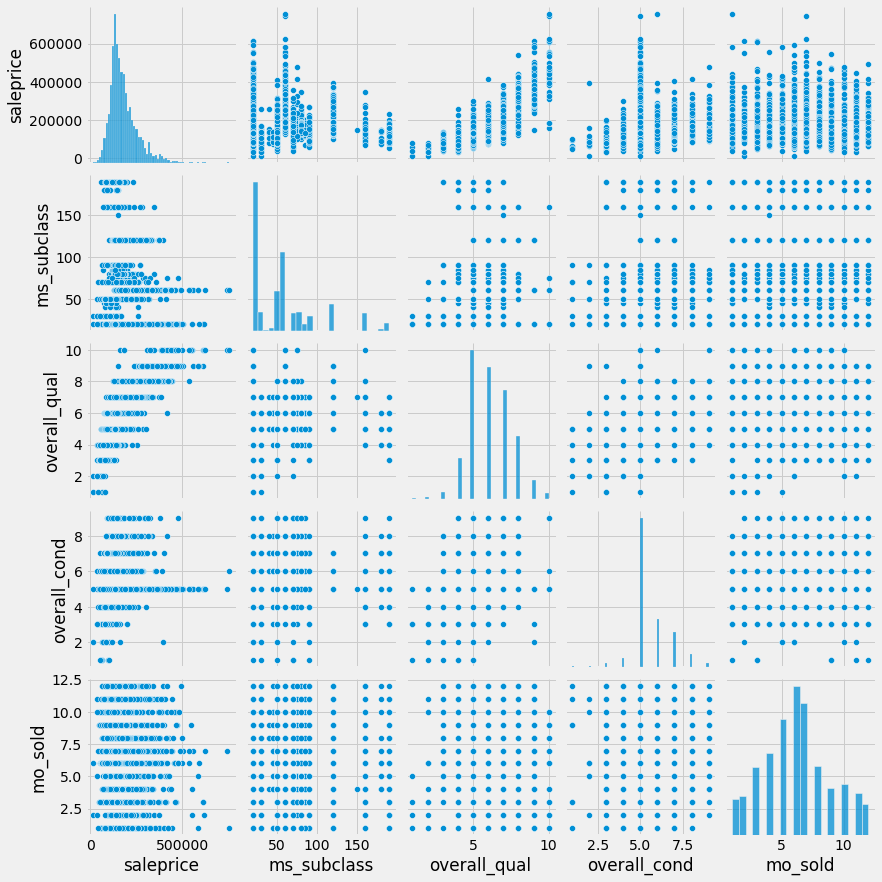

In [41]:
sns.pairplot(ames_numeric_category)

In [42]:
# Ordinal columns
ames_ordinal.head()

saleprice lot_shape utilities land_slope  overall_qual  overall_cond  \
0     215000       IR1    AllPub        Gtl             6             5   
1     105000       Reg    AllPub        Gtl             5             6   
2     172000       IR1    AllPub        Gtl             6             6   
3     244000       Reg    AllPub        Gtl             7             5   
4     189900       IR1    AllPub        Gtl             5             5   

  exter_qual exter_cond bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
0         TA         TA        TA        Gd            Gd            BLQ   
1         TA         TA        TA        TA            No            Rec   
2         TA         TA        TA        TA            No            ALQ   
3         Gd         TA        TA        TA            No            ALQ   
4         TA         TA        Gd        TA            No            GLQ   

  bsmtfin_type_2 heating_qc electrical kitchen_qual functional fireplace_qu  \
0            Unf         Fa      SBrkr           TA        Typ           Gd   
1            LwQ         TA      SBrkr           TA        Typ           NA   
2            Unf         TA      SBrkr           Gd        Typ           NA   
3            Unf         Ex      SBrkr           Ex        Typ           TA   
4            Unf         Gd      SBrkr           TA        Typ           TA   

  garage_finish garage_qual garage_cond paved_drive pool_qc  fence  
0           Fin          TA          TA           P      NA     NA  
1           Unf          TA          TA           Y      NA  MnPrv  
2           Unf          TA          TA           Y      NA     NA  
3           Fin          TA          TA           Y      NA     NA  
4           Fin          TA          TA           Y      NA  MnPrv